In [0]:
DMML ASSIGNMENT 3

In [0]:
Sreya K.K MDS201804
Appu Mathews MDS201814

In [0]:
import numpy as np

import json

from sklearn.model_selection import*
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Reading data which is in json format
data=[]
with open('C:/Users/Shreya/Downloads/newsdata/newsdataset.json') as f:
    for line in f:
        data.append(json.loads(line))
        
#Storing labels and contents in dataframes

labelx=[data[i]['annotation']['label'] for i in range(len(data))]

contentx=[data[i]['content'] for i in range(len(data))]

df1 = pd.DataFrame(labelx, columns = ['Label']) 

df2 = pd.DataFrame(contentx, columns = ['Content']) 

df=pd.concat([df1,df2],axis=1)


#Splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(df['Content'] ,df['Label'], random_state=42)


#Vectorizing the data

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['Content'])

vx_train = vectorizer.transform(x_train)
vx_Test = vectorizer.transform(x_test)  



vector_label=CountVectorizer()
vector_label.fit(df['Label'])

vy_train = vector_label.transform(y_train)
vy_Test = vector_label.transform(y_test) 



from keras.models import Sequential
from keras import layers

# Using kfold(10) validation to split the training data    

kf = KFold(10,shuffle = True)
kf.get_n_splits(df['Content'])
    
for trainindex,testindex in kf.split(x_train):
         X_train,X_test = x_train.iloc[trainindex], x_train.iloc[testindex]
         Y_train,Y_test = y_train.iloc[trainindex], y_train.iloc[testindex]
#Vectorizing the data

         vectorizer = CountVectorizer()
         vectorizer.fit(X_train)
         
         vx_train = vectorizer.transform(X_train)
         vx_test = vectorizer.transform(X_test) 
        
         vectorizer = CountVectorizer()
         vectorizer.fit(Y_train)
         
         vy_train = vectorizer.transform(Y_train)
         vy_test = vectorizer.transform(Y_test)

#Building neural network model            
         input_dim = vx_train.shape[1]  # Number of features
         model = Sequential()
         model.add(layers.Dense(10,input_dim=input_dim,  activation='relu'))
         model.add(layers.Dense(4, activation='sigmoid'))
         #model.add(layers.Dense(4, activation='softmax'))
            
         model.compile(loss='poisson', 
               optimizer='adam', 
               metrics=['accuracy'])
        
         model.summary()

#Fitting data onto the model            
         history=model.fit(vx_train,vy_train,validation_data=(vx_test,vy_test),epochs=10,batch_size=20)

#Accuracy is calculated for training and test data
loss, accuracy = model.evaluate(vx_train, vy_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(vx_test, vy_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                167100    
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 44        
Total params: 167,144
Trainable params: 167,144
Non-trainable params: 0
_________________________________________________________________
Train on 5130 samples, validate on 570 samples
Epoch 1/10
5130/5130 [==============================] - 3s 672us/step - loss: 0.5316 - acc: 0.6871 - val_loss: 0.4447 - val_acc: 0.8561
Epoch 2/10
5130/5130 [==============================] - 3s 577us/step - loss: 0.3850 - acc: 0.9029 - val_loss: 0.3769 - val_acc: 0.8860
Epoch 3/10
5130/5130 [==============================] - 3s 549us/step - loss: 0.3250 - acc: 0.9433 - val_loss: 0.3575 - val_acc: 0.8930
Epoch 4/10
5130/5130 [==============================] - 3s 578us/step - loss:

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

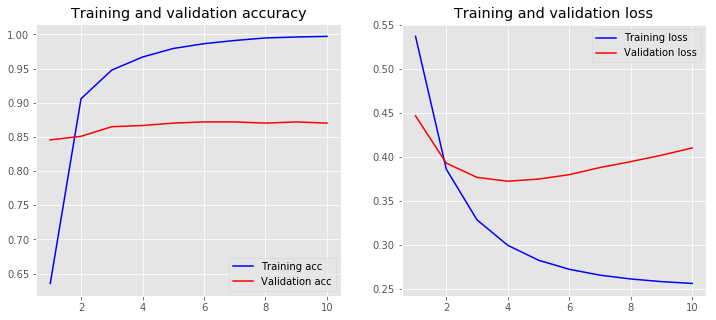

In [0]:
plot_history(history)

       Loss function                            Optimizer
 
      binary crossentropy             1.adam= 93(2layers), 91(3layers)
                                      2.sgd = 77
                                      3.adagrad= 93
                                      4.rmsprop=93.2
                                      5.adadelta=92.5
                                      6.adamax=90
                                      7.nadam=92.8
        
       mean squared error             8.sgd =56
                                      9.adam=84
                                      
       squared hinge                  10.adam=85
                                      11.adagrad=85
 
       logcosh                        12.adagrad=81 
                                      13.sgd=23(3 layers)
                                      14.sgd=44(2 layers)
       poisson                        15.adam=86            